<h3> Data exploration notebook </h3>
<p> In this notebook I played around with the given databases a bit and put a few visualisations for the purpose of data exploration. We might be able to use a visualisation for one of the posters as well. </p>

<p> First, the necessary imports: </p>

In [1]:
import pandas as pd
import os
import pm4py
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization


<p> Moving the working directory so xes files outside of the git repository can be read.</p>
<p> NOTE: I have all the datasets in their own separate directories in the parent folder of this notebook, so if you have the datasets located elsewhere importing will not work! Uncomment the print statement to see the current working directory.</p>

In [2]:
os.chdir('..')
#print(os.path.abspath(os.curdir)) 

<p> Import the data logs, and convert them into a format useable by PM4Py. To see visualisations of the other data logs, change the xes file location in the first line (if you simply copy/paste the file path it should work). The commented lines let you see the resulting table but it's not very legible.</p>

In [3]:
log_xes = xes_importer.apply('BPI_chall_2017/BPI Challenge 2017.xes')
log = log_converter.apply(log_xes)
#df = pd.DataFrame(log_xes)
#display(df)

<p> Create a Petri Net using Alpha Miner. I'm not sure yet how this works since there are some states with no in- or outgoing transitions at the start and some states that have no ingoing transitions. This might have something to do with limitations of Alpha Miner?</p>
<p> Also note that PyViz needs to be installed for this to work. </p>

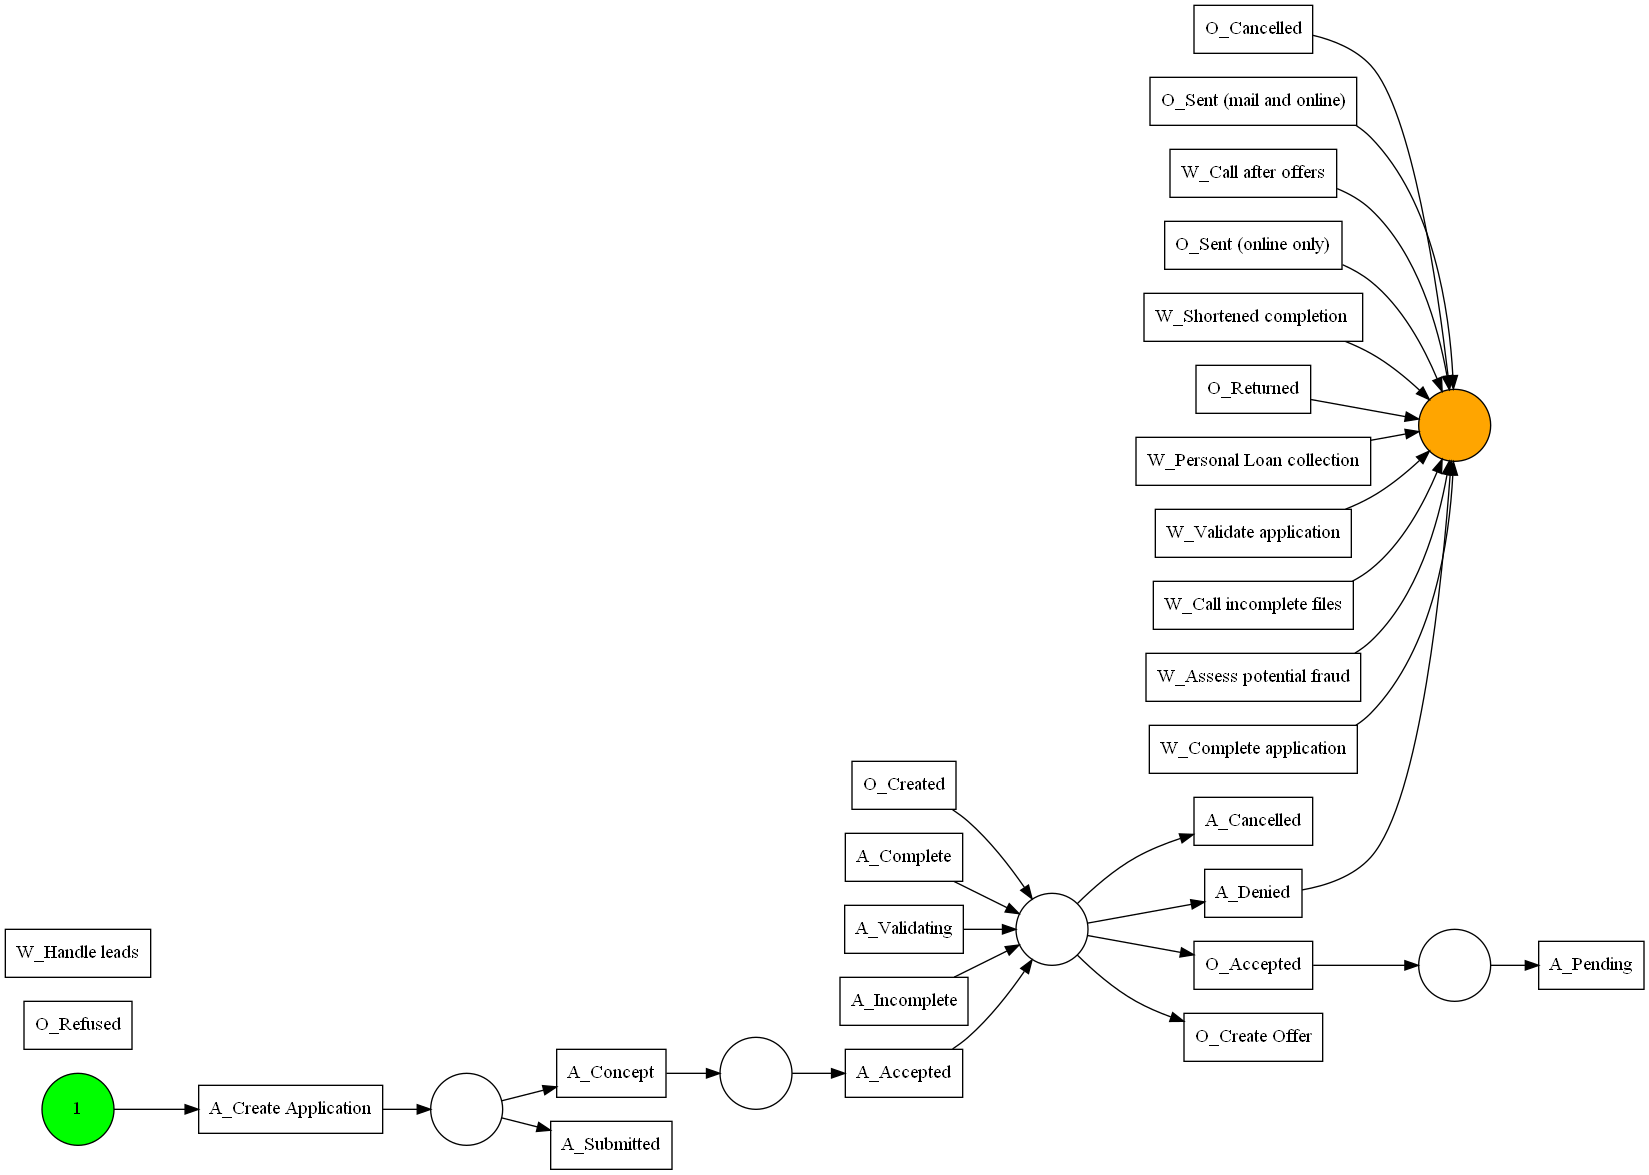

In [4]:
alpha_petri_net, alpha_initial_marking, alpha_final_marking = alpha_miner.apply(log)
pm4py.view_petri_net(alpha_petri_net, alpha_initial_marking, alpha_final_marking, format='png') 

<p> Creating a process tree using Inductive Miner. There are multiple variants of Inductive Miner, uncomment the corresponding line to see visualisations from this variant.</p>

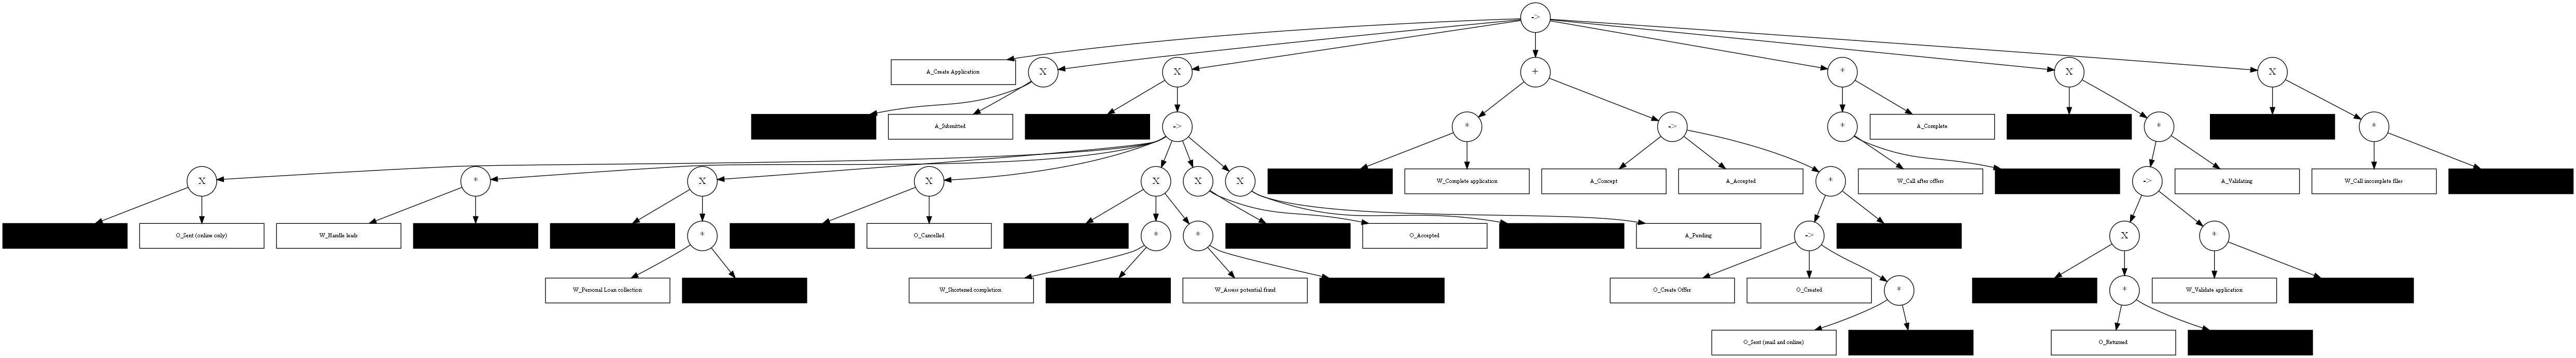

In [5]:
#inductive_tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IM)
inductive_tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IMf)
#inductive_tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IMd)
gviz_inductive_tree = pt_visualizer.apply(inductive_tree)
pt_visualizer.view(gviz_inductive_tree)

<p> Convert the obtained process tree into a petri tree. The Petri tree obtained with IM is a lot more clear than the one obtained with Alpha Miner. </p>

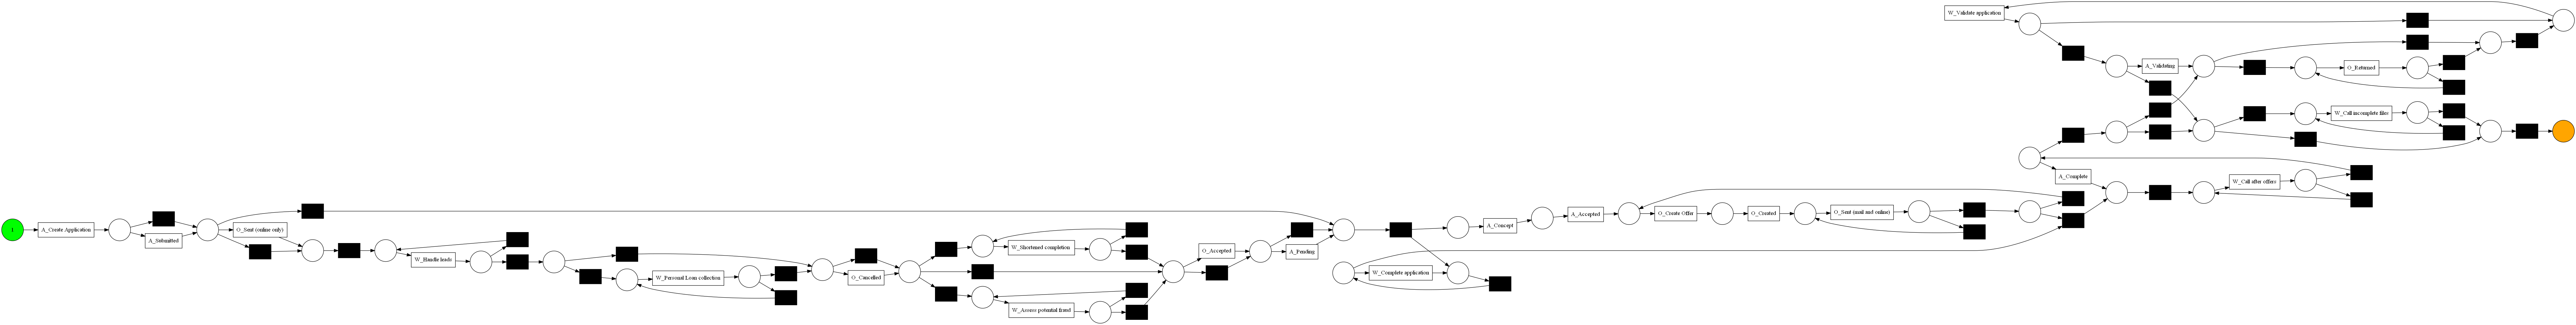

In [6]:
inductive_net, inductive_initial_marking, inductive_final_marking = pt_converter.apply(inductive_tree, variant=pt_converter.Variants.TO_PETRI_NET)
pm4py.view_petri_net(inductive_net, inductive_initial_marking, inductive_final_marking, format='png') 

<p> Obtaining a Directly-Follows Graph from the chosen data log. Two events are connected if there is at least one trace in the log s.t. the source event/activity is followed by the target event/activity. For the purpose of exploring the datasets, the Heuristic Net is particularly interesting because it shows the number of cases that go through each transition from one event to another. We can change the graph to show, instead of the frequency of an event following another, the time elapsed (uncomment the corresponding line to see this variant)</p>

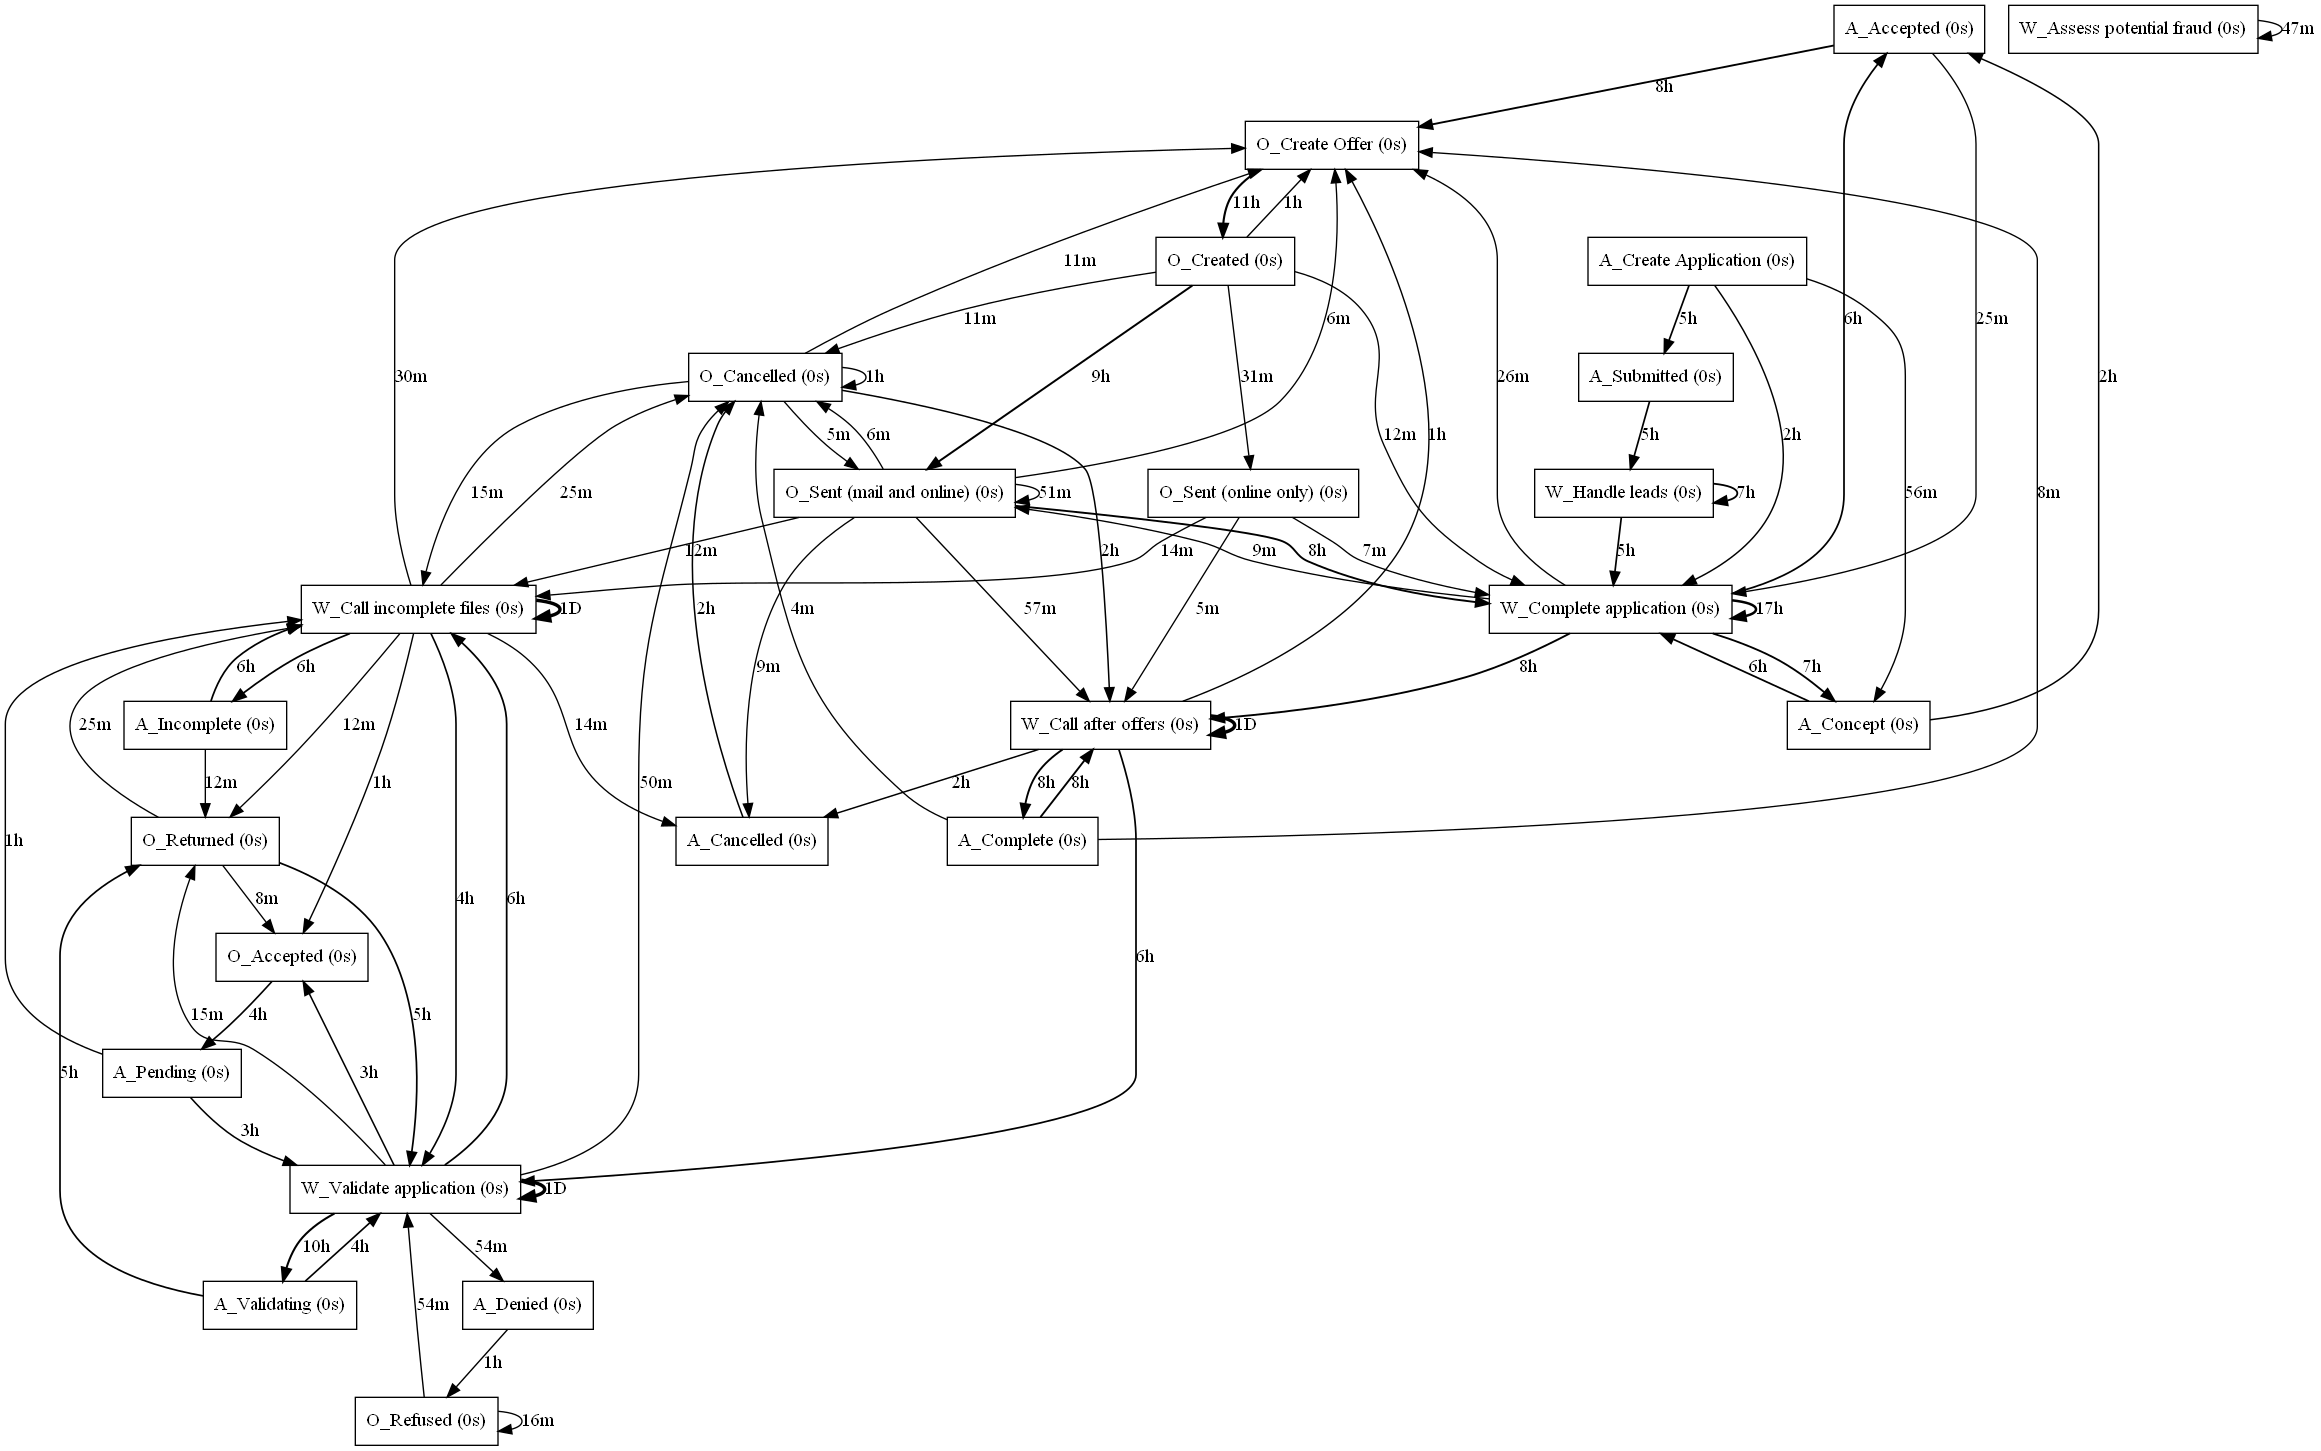

In [7]:
dfg = dfg_discovery.apply(log)
#dfg_gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(dfg_gviz)

<p> Finally, create and show a Heuristic net. This is created using the Heuristics Miner algorithm, which acts on the Directly-Follows Graph but provides a way to handle noise (you can change the dependency threshold; as you lower it the graph becomes more complex as it includes more links between events that occur less often) and find common constructs. </p>

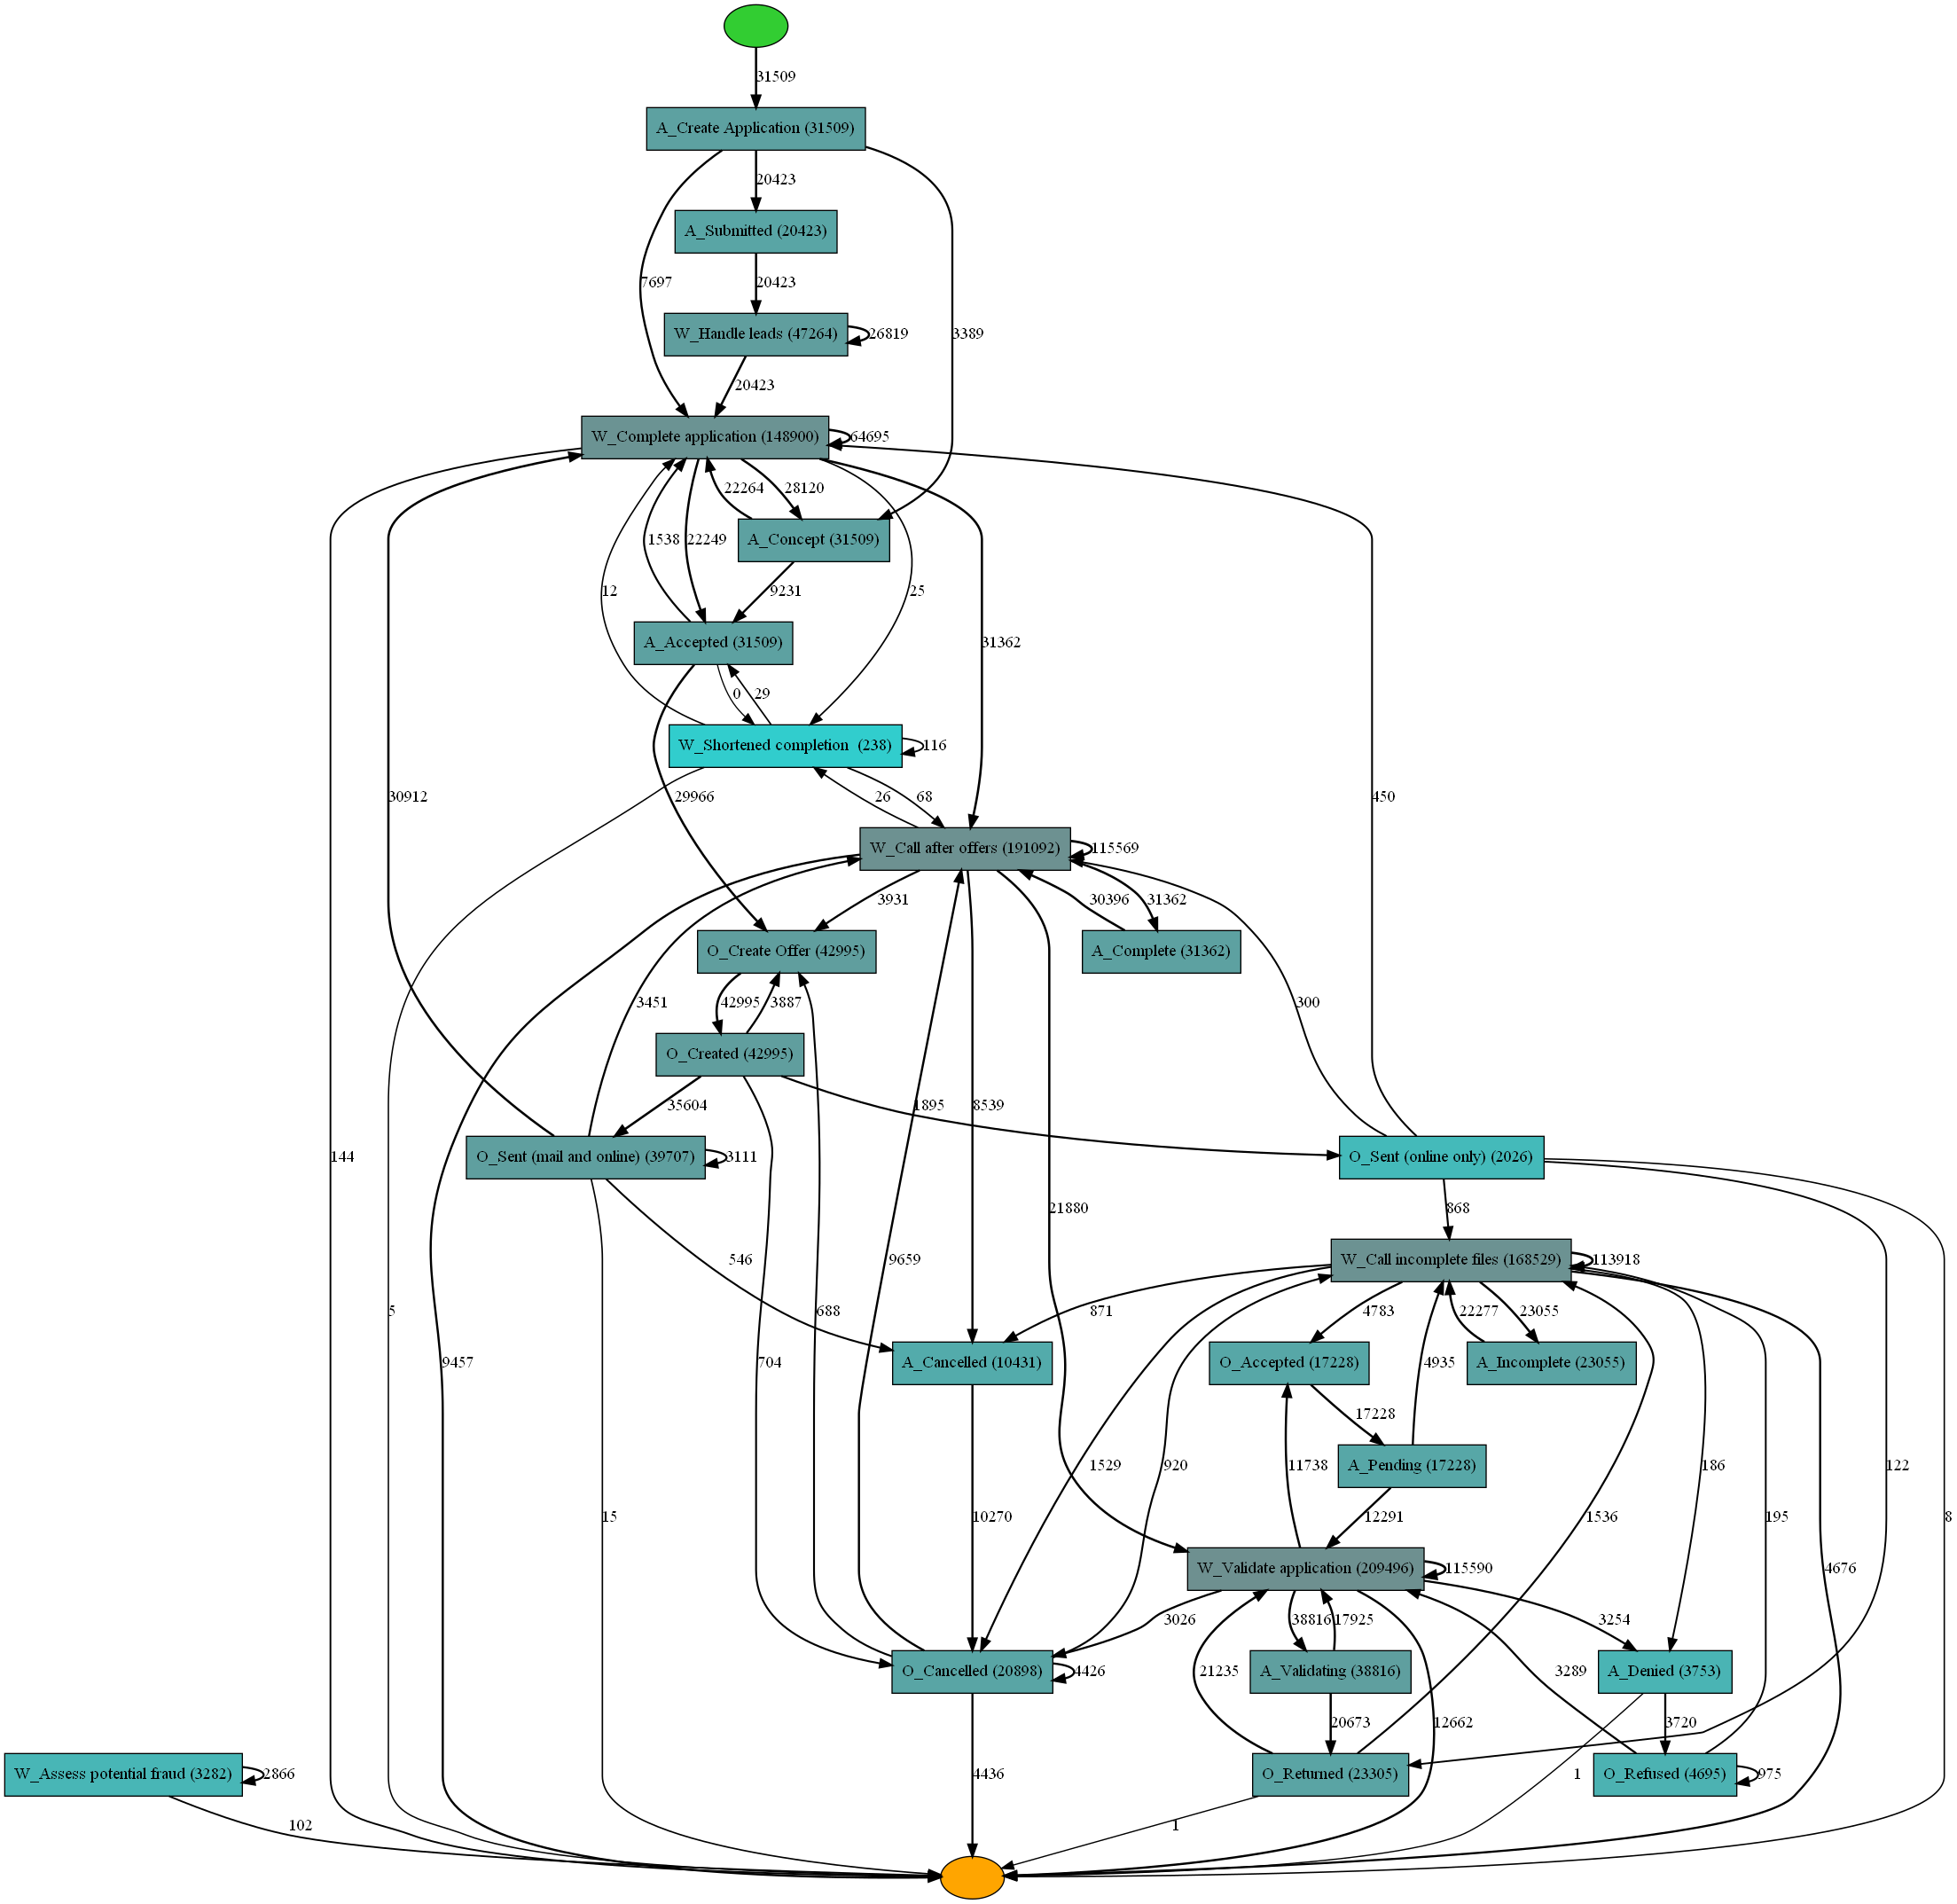

In [8]:
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
heu_gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(heu_gviz)